<a href="https://colab.research.google.com/github/lewisnjue/AI/blob/main/tensor_flow_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# introductin to regression with neurl networks in tensorflow

there are many diefineitoin f a regression problmen but in our case were goitn to simplify it: predicting a numerical varialbe based on some outehr cominatin of variables even shorter .. predicitng a number

In [3]:
tf.__version__

'2.17.1'

## creatdata toview and fit

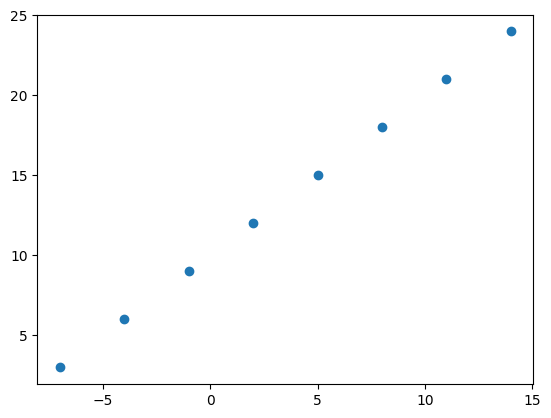

In [4]:
# create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
# create lables
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
# visulaize it
plt.scatter(X,y)

In [5]:
y == (X + 10)
''' this is the relationship i want my model to fingure it out  '''

' this is the relationship i want my model to fingure it out  '

## INput and output shapes

In [6]:
X.shape, y.shape

((8,), (8,))

In [7]:
# create a demo tensor for our housign price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [8]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [9]:
X[0],y[0]

(-7.0, 3.0)

In [10]:
X[0].ndim

0

In [11]:
X[0],y[0]

(-7.0, 3.0)

In [12]:
# turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

In [14]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

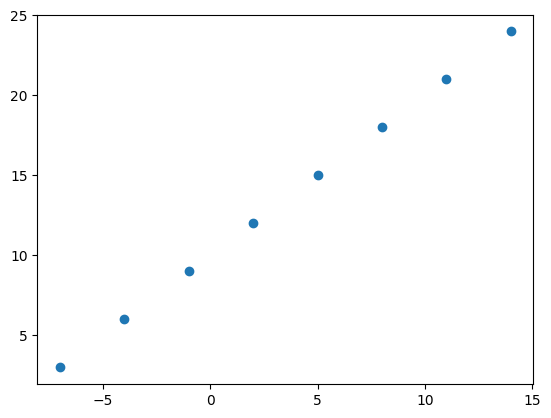

In [15]:
plt.scatter(X,y)

## stps in modelling with tensorflow

1. create  model - define the input and output layes , as well as the hidden layers of a deep learnign model
2. compile a model - define the loss function , and optimzer and also the evaluation metrics ( what w e can use to interpret the performnace of our model).
3. fittign a model - letting the model to try to find y given X

In [16]:
# set the radnom seed
tf.random.set_seed(42)
# create a model using the sequenctial api
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)# the output of this layer is one
])
# compile the model
model.compile(loss = tf.keras.losses.mae,optimizer = tf.keras.optimizers.SGD(),metrics = ['mae'])
# fit the model
# let first expand the dimension for our model
X = tf.expand_dims(X,axis = -1)
model.fit(X,y,epochs = 100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step - loss: 18.3742 - mae: 18.3742
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 18.0930 - mae: 18.0930
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 17.8117 - mae: 17.8117
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 17.5305 - mae: 17.5305
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 17.2492 - mae: 17.2492
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 16.9680 - mae: 16.9680
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 16.6867 - mae: 16.6867
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 16.4055 - mae: 16.4055
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 16.1242 - mae: 16.1242
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 15.8430 - mae: 15.8430
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 15.5617 - mae: 15.5617
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 15.2805 - mae: 15.2805
Epoch 13/100
1/1 ━━━━━━━

In [17]:
# check out X and y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [18]:
# try and make a prediction using our model
model.predict([tf.expand_dims(tf.constant([17.0]),axis = -1)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[29.393257]], dtype=float32)

## imporve our model
we can imporve our model , by altering the steps we took to create a model

1. **creating a model** - hrer we might add more layesr, increase the num ber o hidden untis , within each of the hidden layes, change the activation function of each layer
2. **computing a model** - here we might change the optimizatin function or perhaps the **learing rate** of the optimzation function.
3. **fitting a model** - here we might fit a mode for more epochs


In [19]:
# let me write a more imporved model
model = tf.keras.Sequential([
       tf.keras.layers.Dense(64, activation='linear'),
       tf.keras.layers.Dropout(0.2),  # Example of dropout
       tf.keras.layers.Dense(32, activation='linear'),
       tf.keras.layers.Dense(1, activation='linear')  # Output layer
   ])
model.compile(loss = tf.keras.losses.mae,optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),metrics = ['mae'])

lets break down our model
the first hidden layer is a dnsely connected layer. this measn each neuron in this layer recives inputs from all the neurons in the previous layer( which is the input layer in this case).
it has 63 neurons(or units) the higher the number of neurons , teh more complex patterns thelayer can learn.
it uses the ReLU (rectified Linear unit) activation function . Relu introduces non-linearity into the model . it outpus the input directly if it is poistive


`tf.keras.layers.Dropout(0.2)`:
this is a dropout layer used for regularizaion. it helps prevent overfitting( where the model performs well on training ata but poorly on unseen data).
during training , it randomly sets 20% (o.2) of the inptu units to 0 at each update during graingin time, which helps prevent overrelienc on any single neuron and encorage the network to learn more robust features.



In [20]:
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
X = tf.constant(X,dtype=tf.float32)
y = tf.constant(y,dtype=tf.float32)
X = tf.expand_dims(X,axis = -1)
model.fit(X,y,epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.3191 - mae: 13.3191
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 44.6532 - mae: 44.6532
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 15.2265 - mae: 15.2265
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 15.6259 - mae: 15.6259
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.3343 - mae: 7.3343
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.2995 - mae: 12.2995
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.1400 - mae: 9.1400
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 8.8943 - mae: 8.8943
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.6303 - mae: 11.6303
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 10.4191 - mae: 10.4191
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 5.7523 - mae: 5.7523
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3.6061 - mae: 3.6061
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━

In [21]:
model.predict(tf.expand_dims(tf.constant([-23.0]),axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[-8.028937]], dtype=float32)

## Evaluatng a model

in practice, a typical workflowyoull go through when  building a neural netwrorks is:
```
build a model -> fit it -> evaluat it -> tweak a model -> fit it -> evaluate it ..
```

In [22]:
from tensorflow.keras.utils import plot_model

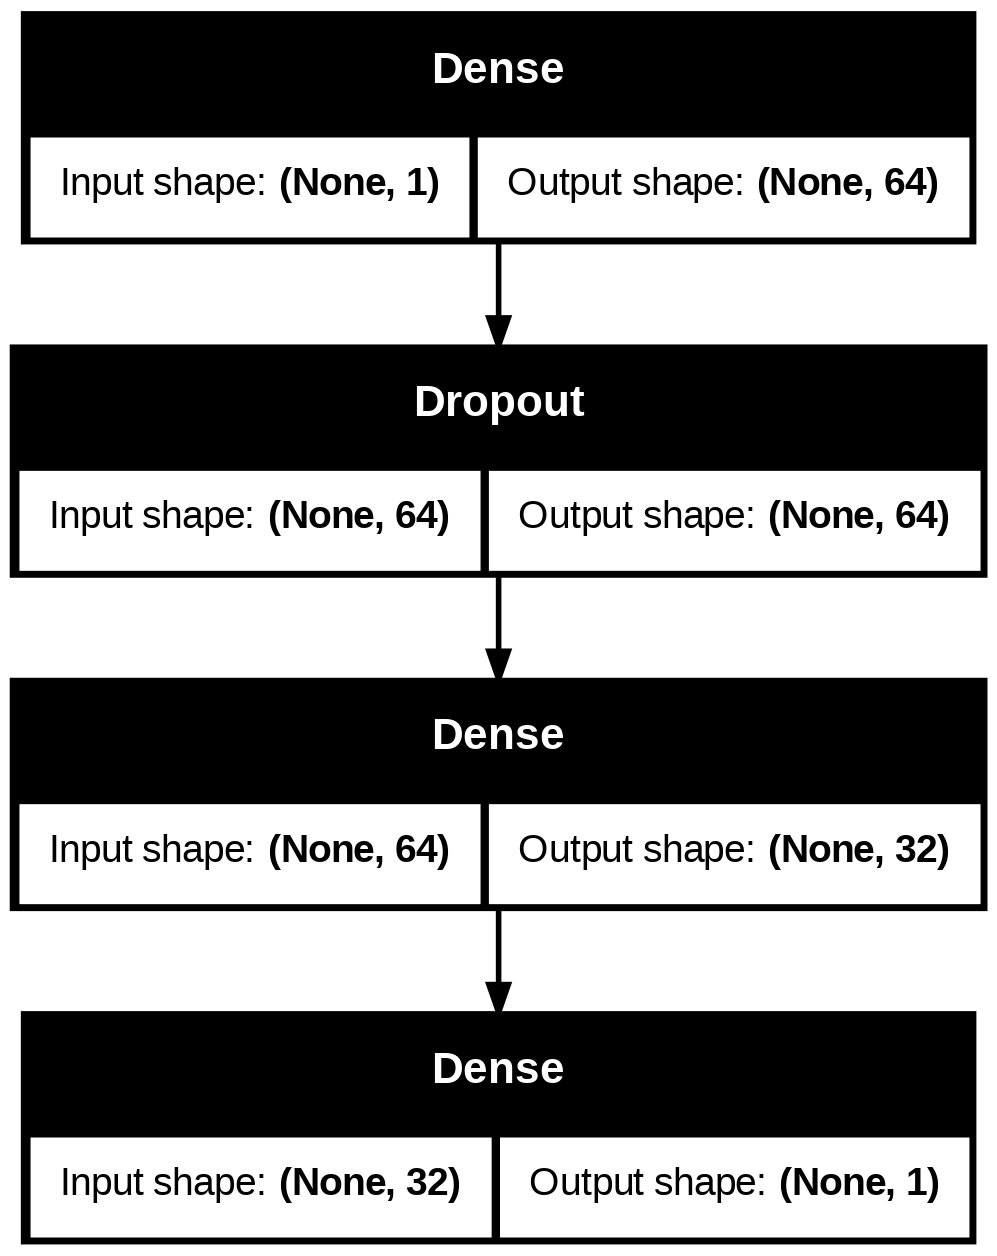

In [23]:
plot_model(model,show_shapes = True)

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,725 (26.27 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,484 (17.52 KB)

In [25]:
# lets create a plotting function
def plot_predictions(train_data = X , train_labels = y, predictions = model.predict(X)):
  ''' plot training data and predictions '''
  plt.figure(figsize = (10,7))
  # plot training data in blue
  plt.scatter(train_data,train_labels,c='b',label='training data')
  # plot training data in green
  plt.scatter(train_data,predictions,c='g',label='predictions')
  # show the legend

  plt.legend()
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


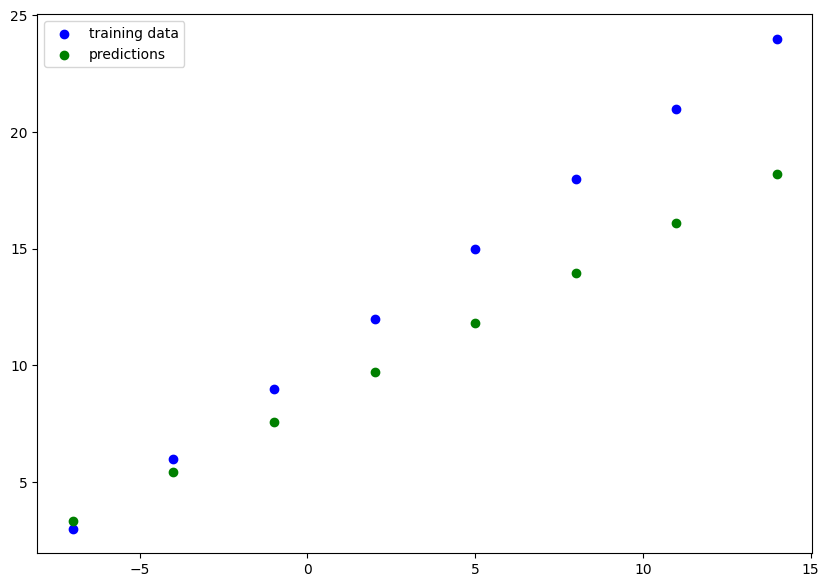

In [26]:
plot_predictions()

### saving our model
saving our models allows us to use them outside of google colab or wherever they were trained


there are two main format
1. saemodel format
2. the HDF5 format

In [30]:
# save a model useing savemodel format
import pathlib
model_path = pathlib.Path('model.keras')
model.save(model_path)

In [31]:
model.save('model.h5')

In [32]:
## loading our models
loaded_model = tf.keras.models.load_model('model.keras')


In [33]:
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,725 (26.27 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,484 (17.52 KB)

In [34]:
loaded_model.predict(tf.expand_dims(tf.constant([-23.0]),axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[-8.028937]], dtype=float32)

In [35]:
loaded_model_2 = tf.keras.models.load_model('model.h5')

In [37]:
loaded_model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,243 (8.77 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [49]:
from typing import Any, Optional, List, Dict, Tuple
from google.colab import files
import io
from pathlib import Path
import os

def download_files(file_paths:Optional[List[Path]]=None,all_files:bool = False):
  try:
    downlod_files = list(file_paths)
  except:
    pass
  if all_files:
    downlod_files = list(os.listdir())
  for file in downlod_files:
    files.download(file)
  else:
    try:
      for path in file_paths:
        files.download(path)
    except:
      print('something went wrong')
      return None
    return None
  return None




In [50]:
download_files(all_files=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

something went wrong


In [53]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

['.config', 'model.h5', 'model.png', 'model.keras', 'sample_data']

|### larger example

In [54]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


In [56]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [57]:
insurance.size

9366

In [58]:
insurance.shape

(1338, 7)

In [59]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [60]:
columns = insurance.columns

In [61]:
columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [64]:
insurance_one_hot = pd.get_dummies(insurance)

In [65]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
